# Regresion Lineal y Descenso del Gradiente

El objetivo es:

*   Implementar grid search, gradient descent y stochastic gradient descent
*   Aprender a visualizer tus resultados
*   Identificar ventajas y desventajas de estos algortimos
*   Analizar el efecto de MSE      
  

# Data

In [ ]:
from lib import *

height, weight, gender = load_data(sub_sample=False)
X, mu_X, sigma_X = standarizer(height)
y, X_ = build_model_data(X, weight)

In [ ]:
y.shape, X_.shape

((10000,), (10000, 2))

# 1. Calcule la funcion costo

Complete las funciones faltantes, verifique con el ejemplo de la clase

In [ ]:
import numpy as np

def loss_function(X_, y, w, option=1):
  """
    Args:
      X_: matrix numpy de la forma (N,2)
      y: vector numpy de la forma (N,)
      w: vector de la forma (2,)
      option: 1 for mse
              0 for mae

    Return:
      El valor de la perdida correspondiente a el parametros de entrada w
  """
 


Ahora si todo esta bien, deberiamos obtener

In [ ]:
xx = np.array([[1 ,1], [1, 2]])
yy = np.array([1, 2])
ww = np.array([0, 1])

loss_function(xx, yy, ww, 1)


0.0

# 2. Grid Search


In [ ]:
def grid_search(X_, y, grid_w0, grid_w1, option):
  """
    Este algoritmo realiza la busqueda creando una cuadricula
    Args:
      X_ : numpy de la forma = (N,2)
      y  : numpy de forma =  (N,)
      grid_w0: numpy de la forma = (num_pts_w0,) .Array 1D que contiene num_pts_w0 valores del parametro w0 a ser probados en la cuadricula
      grid_w1: numpy de la forma = (num_pts_w1,) .Array 1D que contiene num_pts_w1 valores del parametro w1 a ser probados en la cuadricula
      option: scalar value = 1 para MSE y 0 para MAE
    Return:
      losses: numpy de la forma = (num_pts_w0, num_pts_w1). Array 2D que contiene los valores de la funcion de perdidad para cada una de las
              combinaciones de w0 y w1
  """


  losses_grid = np.zeros((len(grid_w0), len(grid_w1)))
  # Codigo a desarrollar ...
  #
  #

  return losses_grid

Si, todo va bien podremos usarla

In [ ]:
def gen_w(start, stop, n_intervals):
  """ Generamos la Grilla """
  grid_w0 = np.linspace(start[0], stop[0], n_intervals)
  grid_w1 = ...
  return grid_w0, grid_w1

def get_best_param(w0, w1, losses_grid):
  """ Obtenemos los mejores w* a partir del resultados obtenidos con la función de perdida en grid search
  """
  min_row, min_col = np.unravel_index(losses_grid.argmin(), losses_grid.shape)
  return losses_grid[min_row, min_col], w0[min_row], w1[min_col]

In [ ]:
import datetime

# Emepzamos generando la malla
start = [-100, -150]
stop = [200, 150]
n_intervals = 10

grid_w0, grid_w1 = gen_w(start, stop, n_intervals)

# iniciamos la busqueda en la malla
start_time = datetime.datetime.now()
grid_losses = grid_search(X_,y, grid_w0, grid_w1, 1)

# Escogemos la mejor combinación
loss_min, w0_best, w1_best = get_best_param(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print(f"Grid Search: loss* = {loss_min}, w0* = {w0_best}, w1* = {w1_best}, execution time = {execution_time} seconds")

Grid Search: loss* = 42.42448314678248, w0* = 66.66666666666669, w1* = 16.666666666666686, execution time = 0.029013 seconds


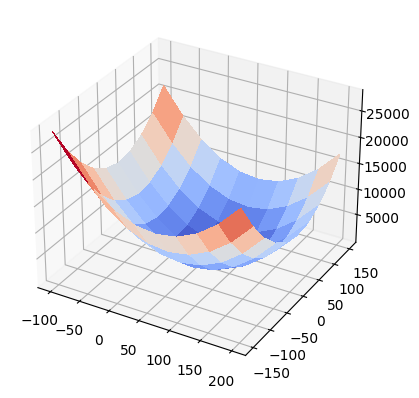

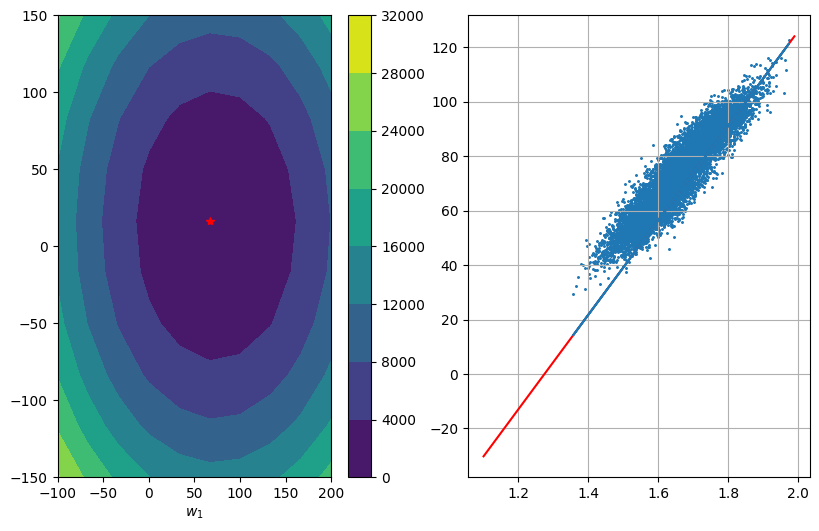

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

def predictions(w0, w1, mu, sigma):
  """ Creemos el modelo de la regresion lineal f(x)"""
  x = np.arange(1.1, 2, 0.01)
  x_normalized = (x - mu)/sigma
  f = w0 + w1*x_normalized
  return x, f

# Grafiquemos los resultados 3D
w0, w1 = np.meshgrid(grid_w0, grid_w1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w0, w1, grid_losses, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig = plt.figure()

# plt contour
ax1 = fig.add_subplot(1,3,1)
contour = ax1.contourf(w0, w1, grid_losses.T)
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r"$w_0$")
ax1.set_xlabel(r"$w_1$")
# ubiacion al minimo  - star
ax1.plot(w0_best, w1_best, marker = '*', color="r")

# plt model
ax2 = fig.add_subplot(1,3,2)
ax2.scatter( height, weight, marker='.', s=5)
ax2.grid()

x, f = predictions(w0_best, w1_best, mu_X, sigma_X)   # Modelos f(x) = w0 +w1*x
ax2 = fig.get_axes()[2]
ax2.plot(x, f, color='r')
ax2.plot(height, w0_best + w1_best*X)                 # Desde los datos
fig.set_size_inches(15, 6)



# 3. Gradient Descent

In [ ]:
def gd(X_, w, y):
  """ Calculo del gradiente en w
  Args:
    X_: numpy de la forma (N,2)
    w : numpy d ela forma (2,) . Vector de parametros del modelos
    y : numpy de la forma (N,)
  Return
    Un vector numpy de la forma (2,) (misma forma que w), que tiene el gradiente de la funcion de perdida en w
  """
  # Codigo a desarrollar ...
  #
  #

Si esta bien, debe darnos lo siguiente

In [ ]:
xx = np.array([[1 ,1], [1, 2]])
yy = np.array([1, 2])
ww = np.array([1, 1])

gd(xx, ww, yy)

(array([1. , 1.5]), array([-1, -1]))

Ahora, iteremos para encontrar el mejor w*

In [ ]:
def gd_algorithm(X_, y, w_initial, max_iters, gamma):
  """
    Algoritmo GD
    Args:
      X_: numpy de la forma (N,2)
      y : numpy de la forma (N,)
      w_inicial: numpy de la forma (2,). Inicializacion del modelo
      max_iters: un escalar indicando el maximo numero de iteraciones
      gamma: escalar indicando el paso o learning rate

    Returns:
      losses: lsita de longuitud max_iters con loas valores de las perdidad para cada iteracion de GD
      wt: una lista de longuitud max_iters con los parametros del modelo como numpy de la forma (2,) apra cada iteracion
  """
  wt = [w_initial]
  losses = []
  w = w_initial

  for n_iter in range(max_iters):
    # Agrega el codigo apara calcular el gradiente y loss
    # ...
    

    # Agrega el coldigo para actualizar w
    # ...
    
    # Guardemos w y loss
    wt.append(w)
    losses.append(loss)
    print(" GD iter {i}/{ti}: loss={l}, w0={w0}, w1={w1}".format( i=n_iter,
          ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))

  return losses, wt

Deberiamos obtener

In [ ]:
max_iters = 50
gamma = 0.7

w_initial = np.array([0, 0])

# Iniciamos
start_time = datetime.datetime.now()
gd_l, gd_w = gd_algorithm(X_, y, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Vamos los resultados
ex_time = (end_time - start_time).total_seconds()
print(f"Tiempo de ejecucion del Algortimo GD: {ex_time:.3f} segundos")

 GD iter 0/49: loss=2792.2367127591674, w0=51.30574540147369, w1=9.435798704492312
 GD iter 1/49: loss=265.30246210895854, w0=66.69746902191572, w1=12.266538315840002
 GD iter 2/49: loss=37.87837955044118, w0=71.31498610804834, w1=13.115760199244331
 GD iter 3/49: loss=17.41021212017447, w0=72.70024123388814, w1=13.37052676426563
 GD iter 4/49: loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
 GD iter 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
 GD iter 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
 GD iter 7/49: loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
 GD iter 8/49: loss=15.385899822261674, w0=73.29247935783843, w1=13.47944711380919
 GD iter 9/49: loss=15.385888944638305, w0=73.29348920882516, w1=13.47963283863509
 GD iter 10/49: loss=15.3858879656522, w0=73.29379216412119, w1=13.479688556082861
 GD iter 11/49: loss=15.385887877543453, w0=73.29388305071, w1=13.479705271317192
 GD